In [ ]:
import pandas as pd
import numpy as np

loading the dataset

In [ ]:
df = pd.read_csv('/content/train.csv')


display the values

In [ ]:
display(df)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


find the missing values

In [70]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if missing_values.empty:
    print("No missing values found in the dataset.")
else:
    print("Missing values found in the following columns:")
    print(missing_values)


No missing values found in the dataset.


null values and duplicates

In [71]:
df  = df.dropna()
df = df.drop_duplicates()


 distribution of different labels

In [72]:
print(df.head())
print(df.columns.tolist())


                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  
['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [ ]:
non_cyberbullying_data = df[(df['toxic'] == 0) & (df['obscene'] == 0) &
                             (df['threat'] == 0) & (df['insult'] == 0) &
                             (df['identity_hate'] == 0)]

non_cyberbullying_sampled = non_cyberbullying_data.sample(n=15000, random_state=42)

cyberbullying_data = df.drop(non_cyberbullying_data.index)

final_train_data = pd.concat([cyberbullying_data, non_cyberbullying_sampled], axis=0)

final_train_data = final_train_data.reset_index(drop=True)



In [ ]:
final_train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31225 entries, 0 to 31224
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             31225 non-null  object
 1   comment_text   31225 non-null  object
 2   toxic          31225 non-null  int64 
 3   obscene        31225 non-null  int64 
 4   threat         31225 non-null  int64 
 5   insult         31225 non-null  int64 
 6   identity_hate  31225 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.7+ MB


data cleaning

In [ ]:
final_train_data= final_train_data.dropna(subset=['comment_text'])


In [ ]:
import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text.lower()

df['cleaned_comments'] = df['comment_text'].apply(clean_text)



In [ ]:
final_train_data['cleaned_text'] = final_train_data['comment_text'].apply(clean_text)
final_train_data['word_count'] = final_train_data['cleaned_text'].apply(lambda x: len(x.split()))
final_train_data = final_train_data[final_train_data['word_count'] <= 250]
final_train_data['tag_count'] = final_train_data[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)

<ipython-input-21-6b55a0937065>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_train_data['tag_count'] = final_train_data[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)


stemming and lemmatization

In [92]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')


lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words('english'))

def process_text(text):
    words = word_tokenize(text)
    processed_words = [stemmer.stem(lemmatizer.lemmatize(word))
                       for word in words if word.lower() not in stop_words and word.isalpha()]
    return " ".join(processed_words)

final_train_data['processed_comments'] = final_train_data['comment_text'].apply(process_text)

final_train_data.to_csv('processed_train_data.csv', index=False)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


data visualisation


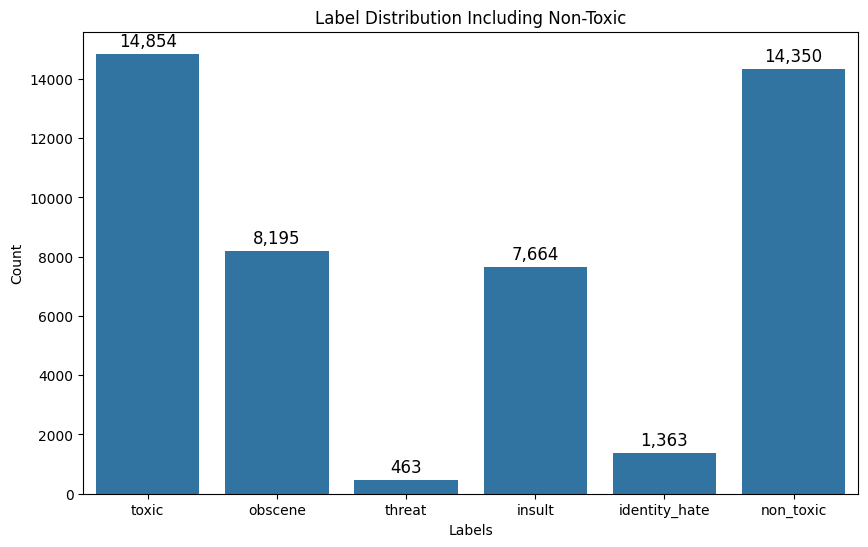

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_counts = final_train_data[labels].sum()

non_toxic_count = len(final_train_data) - (final_train_data[labels].sum(axis=1) > 0).sum()
label_counts['non_toxic'] = non_toxic_count

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Label Distribution Including Non-Toxic')
plt.xlabel('Labels')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 9), textcoords='offset points')

plt.show()


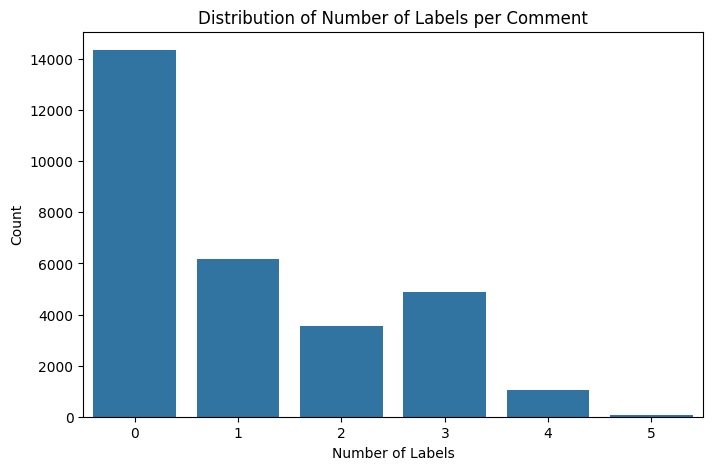

In [90]:
final_train_data['label_count'] = final_train_data[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1)
plt.figure(figsize=(8, 5))
sns.countplot(x='label_count', data=final_train_data)
plt.title('Distribution of Number of Labels per Comment')
plt.xlabel('Number of Labels')
plt.ylabel('Count')
plt.show()


In [ ]:
label_counts = final_train_data[['toxic',  'obscene', 'threat', 'insult', 'identity_hate']].sum()

non_toxic_count = len(final_train_data) - (final_train_data[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0).sum()

label_counts['non_toxic'] = non_toxic_count

label_percentages = (label_counts / len(final_train_data)) * 100

print("Label Distribution as Percentages:")
print(label_percentages)




Label Distribution as Percentages:
toxic            49.363597
obscene          27.234057
threat            1.538666
insult           25.469409
identity_hate     4.529594
non_toxic        47.688678
dtype: float64


Label Distribution as Percentages:
toxic            49.363597
obscene          27.234057
threat            1.538666
insult           25.469409
identity_hate     4.529594
non_toxic        47.688678
dtype: float64


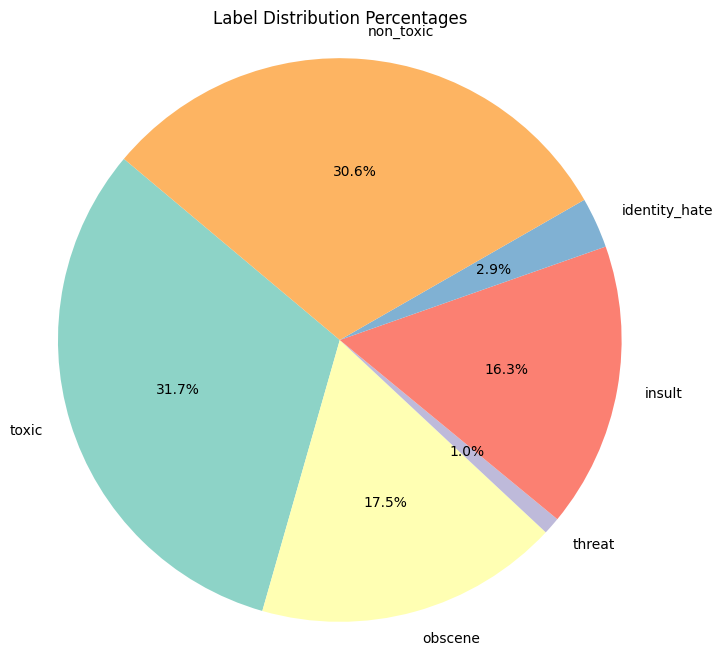

In [91]:
label_counts = final_train_data[['toxic',  'obscene', 'threat', 'insult', 'identity_hate']].sum()

non_toxic_count = len(final_train_data) - (final_train_data[['toxic',  'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0).sum()

label_counts['non_toxic'] = non_toxic_count

label_percentages = (label_counts / len(final_train_data)) * 100

print("Label Distribution as Percentages:")
print(label_percentages)

plt.figure(figsize=(8, 8))
plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3", len(label_percentages)))
plt.title('Label Distribution Percentages')
plt.axis('equal')
plt.show()


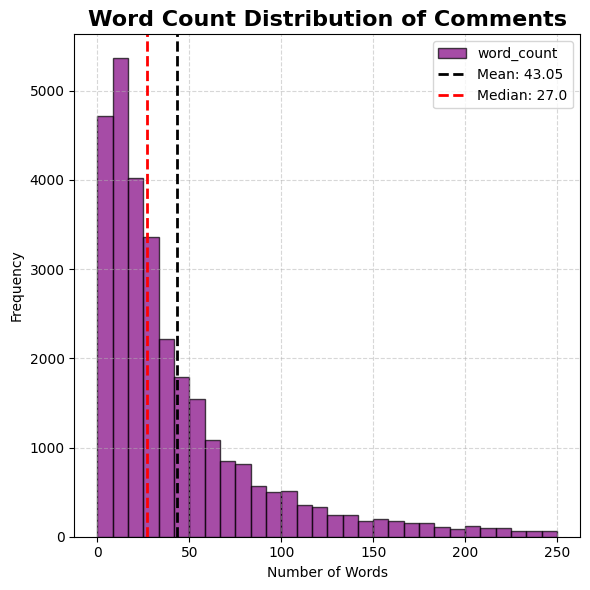

In [ ]:

plt.figure(figsize=(6, 6))

ax = final_train_data['word_count'].plot(kind='hist', bins=30, color='purple', edgecolor='black', alpha=0.7)

plt.grid(True, linestyle='--', alpha=0.5)

mean = final_train_data['word_count'].mean()
plt.axvline(mean, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')

median = final_train_data['word_count'].median()
plt.axvline(median, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median}')
plt.title('Word Count Distribution of Comments', fontsize=16, fontweight='bold')
plt.xlabel('Number of Words', fontsize=10)
plt.ylabel('Frequency', fontsize=10)

plt.legend()
plt.tight_layout()
plt.show()


wordclouds

In [74]:
pip install wordcloud


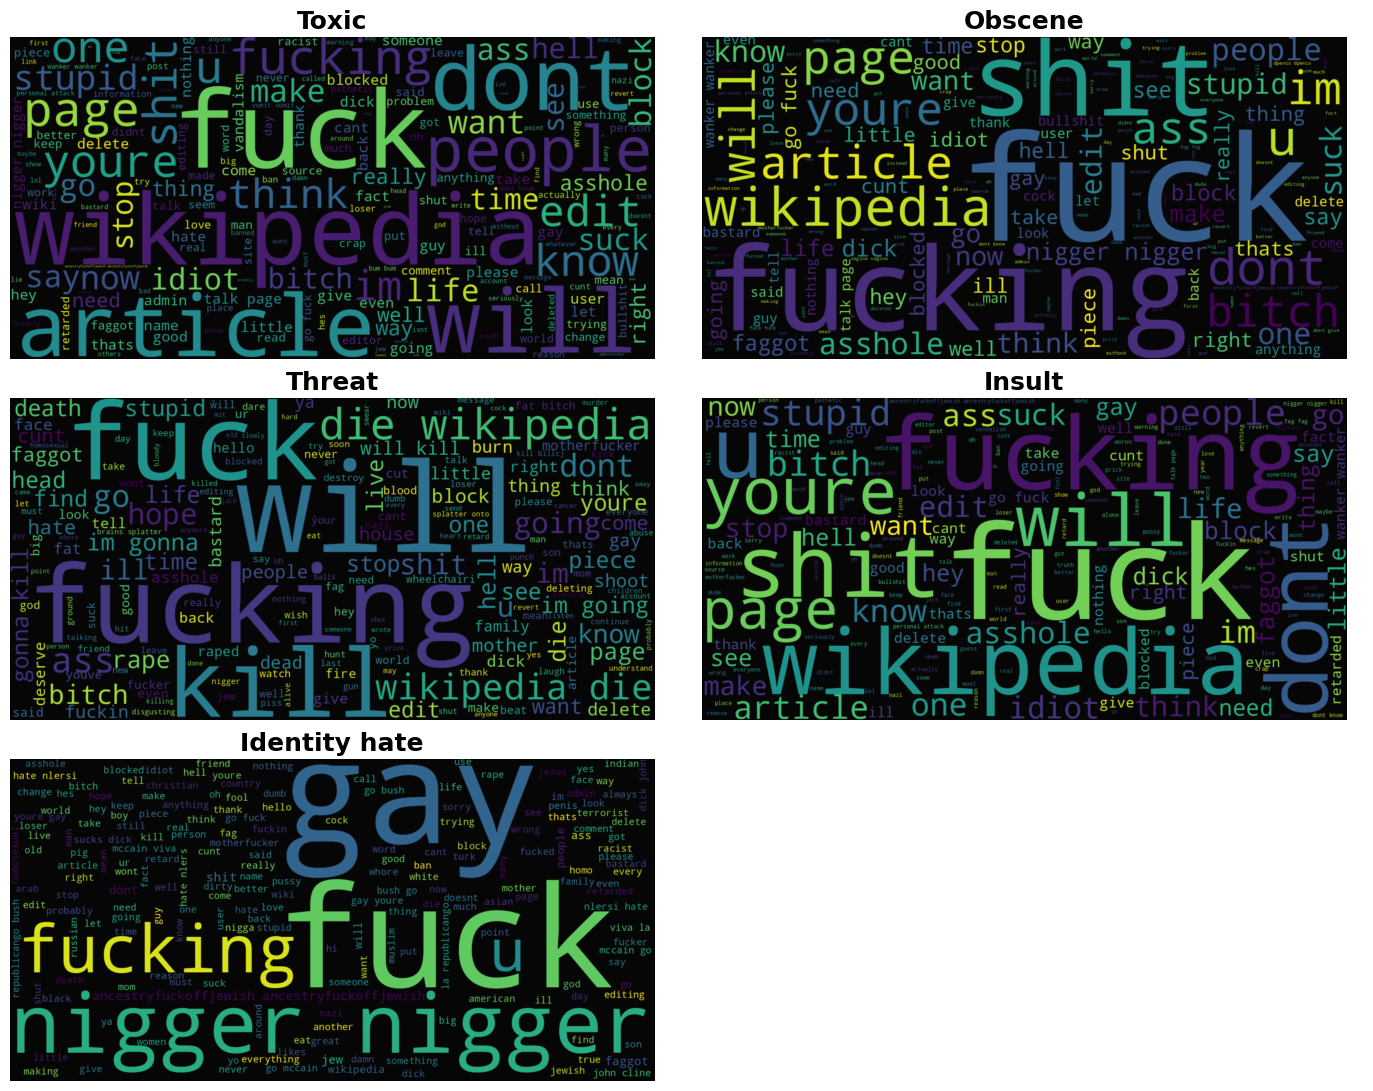

In [75]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

num_labels = len(labels)
rows = (num_labels + 1) // 2
cols = min(2, num_labels)

fig, axes = plt.subplots(rows, cols, figsize=(14, 11))

axes = axes.flatten()

for i, label in enumerate(labels):
    class_comments = final_train_data[final_train_data[label] == 1]['cleaned_text']
    text = ' '.join(class_comments)

    if not text.strip():
        axes[i].text(0.5, 0.5, "No data available", ha='center', va='center', fontsize=16, fontweight='bold')
    else:
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='#060606',
            colormap='viridis',
            max_words=200,
            scale=2
        ).generate(text)

        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(
            label.replace('_', ' ').capitalize(),
            fontsize=18,
            fontweight='bold'
        )
        axes[i].axis('off')

if num_labels < rows * cols:
    for i in range(num_labels, rows * cols):
        axes[i].axis('off')

plt.tight_layout(h_pad=1.0, w_pad=1.0)
plt.show()


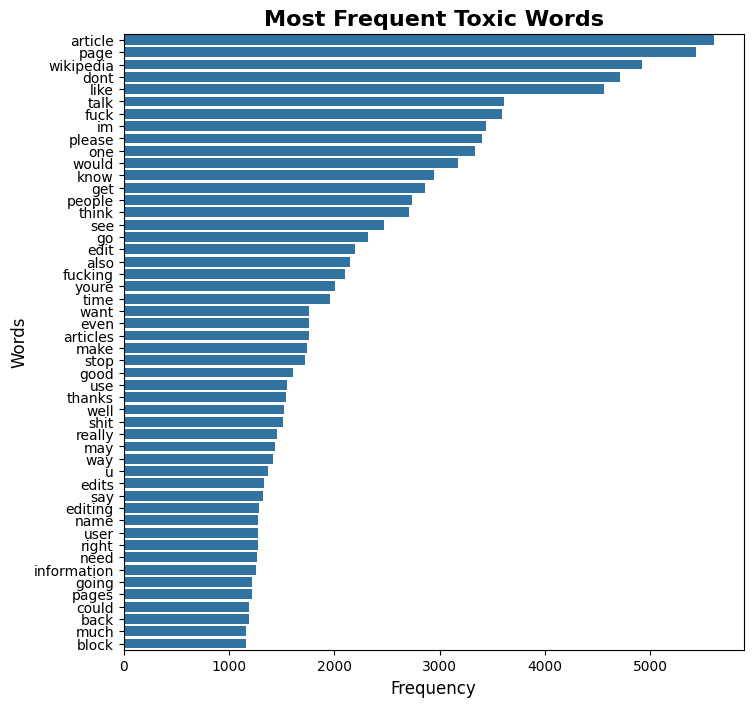

In [88]:


toxic_df = pd.read_csv('/content/toxic_word_frequencies.csv')

toxic_df = toxic_df.head(50)

plt.figure(figsize=(8, 8))
sns.barplot(x='Frequency', y='Word', data=toxic_df)
plt.title('Most Frequent Toxic Words', fontsize=16, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


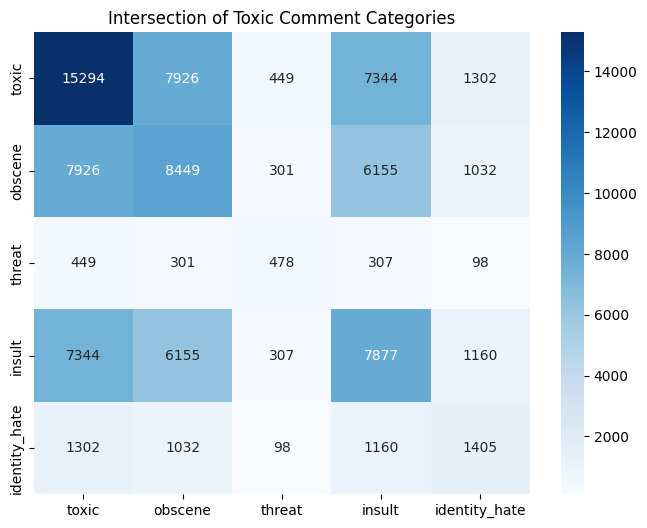

In [81]:

intersection_counts = pd.DataFrame(0, index=labels, columns=labels)

for label1 in labels:
    for label2 in labels:
        intersection_counts.loc[label1, label2] = ((df[label1] == 1) & (df[label2] == 1)).sum()

plt.figure(figsize=(8, 6))
sns.heatmap(intersection_counts, annot=True, cmap="Blues", fmt="d")
plt.title("Intersection of Toxic Comment Categories")
plt.show()




imbalace in data


In [87]:


TARGET_COUNT = 15000
oversampled_data = [final_train_data]

label_columns = ['toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for label in label_columns:
    label_rows = final_train_data[final_train_data[label] == 1]
    unique_rows = label_rows[(final_train_data[label_columns].sum(axis=1) == 1)]
    current_count = len(label_rows)
    unique_count = len(unique_rows)

    if current_count < TARGET_COUNT:
        additional_count = TARGET_COUNT - current_count

        if unique_count > 0:
            duplicates = unique_rows.sample(n=additional_count, replace=True, random_state=42)
            oversampled_data.append(duplicates)

balanced_df = pd.concat(oversampled_data, ignore_index=True)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)


<ipython-input-87-34bf16703995>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_rows = label_rows[(final_train_data[label_columns].sum(axis=1) == 1)]
<ipython-input-87-34bf16703995>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_rows = label_rows[(final_train_data[label_columns].sum(axis=1) == 1)]
<ipython-input-87-34bf16703995>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_rows = label_rows[(final_train_data[label_columns].sum(axis=1) == 1)]
<ipython-input-87-34bf16703995>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_rows = label_rows[(final_train_data[label_columns].sum(axis=1) == 1)]
<ipython-input-87-34bf16703995>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_rows = label_rows[(final_train_data[label_columns].sum(axis=1) == 1)]


In [ ]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72552 entries, 0 to 72551
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  72552 non-null  object
 1   comment_text        72552 non-null  object
 2   toxic               72552 non-null  int64 
 3   obscene             72552 non-null  int64 
 4   threat              72552 non-null  int64 
 5   insult              72552 non-null  int64 
 6   identity_hate       72552 non-null  int64 
 7   cleaned_text        72552 non-null  object
 8   word_count          72552 non-null  int64 
 9   tag_count           72552 non-null  int64 
 10  processed_comments  72552 non-null  object
 11  label_count         72552 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 6.6+ MB


Model Training and evaluation

logistic regression

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = balanced_df['cleaned_text']
y = balanced_df[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

models = {}
y_pred = []

for label in y.columns:
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train[label])
    models[label] = model
    y_pred.append(model.predict(X_test))

y_pred = np.array(y_pred).T

for idx, label in enumerate(y.columns):
    print(f"Classification Report for {label}:")
    print(classification_report(y_test[label], y_pred[:, idx]))



Classification Report for toxic:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     11464
           1       0.94      0.70      0.81      3047

    accuracy                           0.93     14511
   macro avg       0.93      0.85      0.88     14511
weighted avg       0.93      0.93      0.92     14511

Classification Report for obscene:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11493
           1       0.93      0.85      0.89      3018

    accuracy                           0.96     14511
   macro avg       0.95      0.92      0.93     14511
weighted avg       0.96      0.96      0.96     14511

Classification Report for threat:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11474
           1       1.00      0.98      0.99      3037

    accuracy                           0.99     14511
   macro avg       1.00   

svm


In [85]:

from sklearn.svm import LinearSVC

X = balanced_df['cleaned_text']
y = balanced_df[['toxic', 'obscene', 'threat', 'insult', 'identity_hate']]

vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

models = {}
y_pred = []

for label in y.columns:
    model = LinearSVC(max_iter=1000)
    model.fit(X_train, y_train[label])
    models[label] = model
    y_pred.append(model.predict(X_test))

y_pred = np.array(y_pred).T

for idx, label in enumerate(y.columns):
    print(f"Classification Report for {label}:")
    print(classification_report(y_test[label], y_pred[:, idx]))


Classification Report for toxic:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11464
           1       0.91      0.80      0.85      3047

    accuracy                           0.94     14511
   macro avg       0.93      0.89      0.91     14511
weighted avg       0.94      0.94      0.94     14511

Classification Report for obscene:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     11493
           1       0.91      0.88      0.89      3018

    accuracy                           0.96     14511
   macro avg       0.94      0.93      0.93     14511
weighted avg       0.96      0.96      0.96     14511

Classification Report for threat:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     11474
           1       1.00      0.98      0.99      3037

    accuracy                           0.99     14511
   macro avg       1.00   

logisitc regression predicition

In [84]:
def predict_text(text):
    clean_text_input = clean_text(text)
    text_tfidf = vectorizer.transform([clean_text_input])
    bullying_categories = []

    for label in y.columns:
        decision_value = models[label].decision_function(text_tfidf)
        if decision_value >= 0:
            bullying_categories.append(label)

    if bullying_categories:
        result_message = f"The input text is CYBERBULLYING in the following categories: {', '.join(bullying_categories)}."
    else:
        result_message = "The input text is NOT cyberbullying."

    return result_message


custom_text = input("Enter a comment to check for cyberbullying: ")
result = predict_text(custom_text)
print(result)



Enter a comment to check for cyberbullying: i will kill you asshole
The input text is CYBERBULLYING in the following categories: toxic, obscene, threat, insult.
